# matplotlib绘图

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

### plot 函数基本的用法有以下四种：

默认参数:plt.plot(x,y)

指定参数:plt.plot(x,y, format_str)

默认参数，x 为 0~N-1
plt.plot(y)

指定参数，x 为 0~N-1
plt.plot(y, format_str)

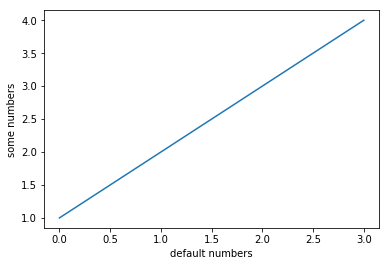

In [3]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.xlabel('default numbers')
plt.show()

### 传入numpy数组
向 plot 中传入 numpy 数组是更常用的做法。事实上，如果传入的是列表，matplotlib 会在内部将它转化成数组再进行处理：

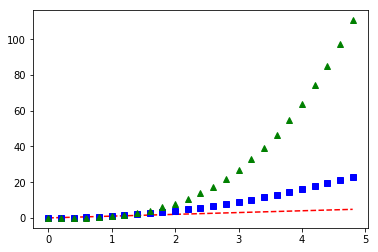

In [6]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', 
         t, t**2, 'bs', 
         t, t**3, 'g^')

plt.show()

#### 我们要画出红色圆点

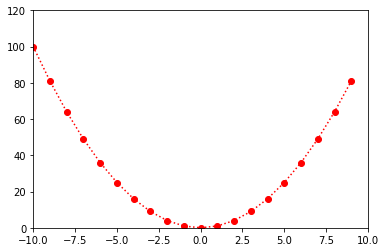

In [19]:
x = np.arange(-10, 10, 1)
y = x ** 2
plt.plot(x, y, ':ro')
# 指定 x 轴显示区域为 0-11，y 轴为 0-120
plt.axis([-10, 10, 0, 120])
plt.show()

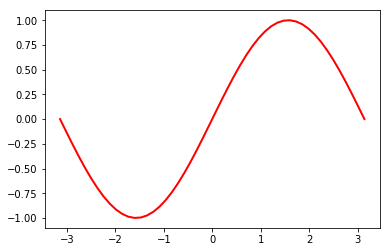

In [22]:
x = np.linspace(-np.pi, np.pi)
y = np.sin(x)

plt.plot(x, y, linewidth=2, color='r')
plt.show()

## 绘制子图
figure() 函数会产生一个指定编号为 num 的图：plt.figure(num)

使用 subplot 可以在一副图中生成多个子图，其参数为：plt.subplot(numrows, numcols, fignum)

当 numrows * numcols < 10 时，中间的逗号可以省略，因此 plt.subplot(211) 就相当于 plt.subplot(2,1,1)

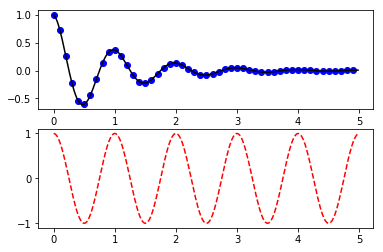

In [23]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0., 5., 0.1)
t2 = np.arange(0., 5., 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

采用plt.hist() 可以用来画直方图

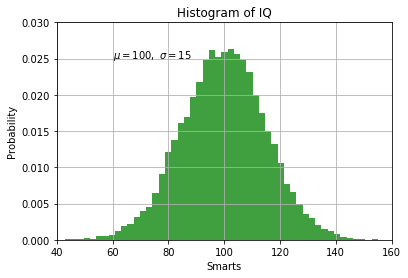

In [30]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

## 使用 style 来配置 pyplot 风格
style 是 pyplot 的一个子模块，方便进行风格转换， pyplot 有很多的预设风格，可以使用 plt.style.available 来查看

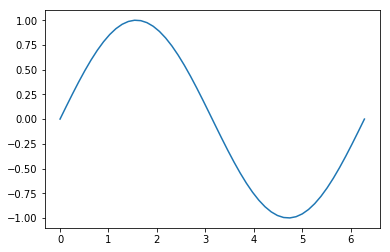

In [31]:
x = np.linspace(0, 2 * np.pi)
y = np.sin(x)

plt.plot(x, y)

plt.show()

例如，我们可以模仿 R 语言中常用的 ggplot 风格：

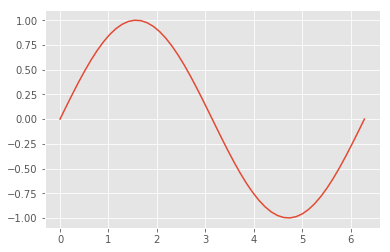

In [33]:
plt.style.use('ggplot')
plt.plot(x, y)
plt.show()

有时候，我们不希望改变全局的风格，只是想暂时改变一下分隔，则可以使用 context 将风格改变限制在某一个代码块内：

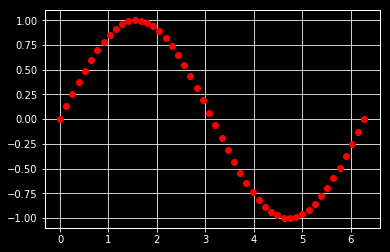

In [35]:
with plt.style.context(('dark_background')):
    plt.plot(x, y, 'ro')
    plt.show()

事实上，我们还可以自定义风格文件。

自定义文件需要放在 matplotlib 的配置文件夹 mpl_configdir 的子文件夹 mpl_configdir/stylelib/ 下，以 .mplstyle 结尾。

mpl_configdir 的位置可以这样查看：

In [37]:
mpl.get_configdir()

'C:\\Users\\Administrator\\.matplotlib'

里面的内容以 

属性：值 的形式保存：

axes.titlesize : 24

axes.labelsize : 20

lines.linewidth : 3

lines.markersize : 10

xtick.labelsize : 16

ytick.labelsize : 16

假设我们将其保存为 mpl_configdir/stylelib/presentation.mplstyle，那么使用这个风格的时候只需要调用：

plt.style.use('presentation')